<a href="https://colab.research.google.com/github/Raptor-sj22/ML-Training/blob/main/logistic-regression/Logistic_Regression_Exercise__4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Logistic_Regression_Exercise _4
## Project Summary


In [ ]:
#@title Import Packages
import kagglehub
import pandas as pd
from sklearn.utils import shuffle
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#@title Downloading the Dataset

# Download The wine quality dataset from kaggle
path = kagglehub.dataset_download("uciml/iris")

RAW_DATASET=pd.read_csv(path+ "/Iris.csv")
RAW_DATASET

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#@title Cleaning, Shuffling, and Converting Categorial Data to Boolian using One-hot encoding
#Cleaning Dataset from nan
Cleaned_dataset=RAW_DATASET.dropna()
Cleaned_dataset=Cleaned_dataset.drop(columns=['Id'])
#Shuffling Dataset
Shuffled_Cleaned_dataset=shuffle(Cleaned_dataset, random_state=42)

# One-hot encoding the 'Species' column
OHE_Shuffled_Cleaned_dataset= pd.get_dummies(Shuffled_Cleaned_dataset, columns=['Species']).astype(int)

# Show the first few rows
OHE_Shuffled_Cleaned_dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
73,6,2,4,1,0,1,0
18,5,3,1,0,1,0,0
118,7,2,6,2,0,0,1
78,6,2,4,1,0,1,0
76,6,2,4,1,0,1,0
...,...,...,...,...,...,...,...
71,6,2,4,1,0,1,0
106,4,2,4,1,0,0,1
14,5,4,1,0,1,0,0
92,5,2,4,1,0,1,0


In [ ]:
#@title Analyzing Dataset

# Data Analyzes and Reports

# Print the "Raw Data" heading
print("\n\nRaw Data\n")

# Display the dataset (shows the first few rows in a notebook-style interface)
display(OHE_Shuffled_Cleaned_dataset)

# Print the "Data Information" heading
print("\n\nData Information\n" )

# Display the basic information about the dataset: columns, data types, and null values
display(OHE_Shuffled_Cleaned_dataset.info())

# Print the "Data Statistical Analyze" heading
print("\n\nData Statistical Analyze\n")

# Display basic statistical analysis (mean, std, min, max, etc.) for the numerical columns of the dataset
display(OHE_Shuffled_Cleaned_dataset.describe())

# Extracting features and label tags (column names)

# Drop the one-hot encoded label columns ('Species_Iris-setosa', 'Species_Iris-versicolor', 'Species_Iris-virginica')
# to get the feature columns (input variables)
Feature_tags = OHE_Shuffled_Cleaned_dataset.columns.drop(['Species_Iris-setosa','Species_Iris-versicolor','Species_Iris-virginica'])

# The remaining columns are assumed to be the label columns (target variables) that indicate species classes
Label_tags = OHE_Shuffled_Cleaned_dataset.columns.drop(Feature_tags)

# Extract the feature data (X) corresponding to the feature columns from the dataset
XX = OHE_Shuffled_Cleaned_dataset[Feature_tags]

# The following line is commented out but would normally extract the labels (Y) using the target columns (Label_tags)
# yy = OHE_Shuffled_Cleaned_dataset[Label_tags]

# Convert the one-hot encoded label columns into a single 1D label column using idxmax
# For each row, idxmax will return the column name that has the maximum value (the 1 in the one-hot encoded vector)
yy_single = OHE_Shuffled_Cleaned_dataset[Label_tags].idxmax(axis=1)

# Clean up the resulting label names by removing the 'Species_' prefix
yy_single = yy_single.str.replace('Species_', '')

# Calculate the mutual information (MI) between the features (XX) and the single target label (yy_single)
# MI measures the dependency between the features and target variable, which helps with feature selection
mi = mutual_info_classif(XX, yy_single)

# Create a DataFrame to store the mutual information for each feature
mi_df = pd.DataFrame({'Feature': XX.columns, 'Mutual Information': mi})

# Sort the DataFrame in descending order based on mutual information to see which features are most informative
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

# Print the "Mutual Information for Classification" heading
print("\n\n Mutal Information for Classification\n")

# Display the sorted DataFrame, showing the features and their corresponding mutual information values
print(mi_df)




Raw Data



,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
73,6,2,4,1,0,1,0
18,5,3,1,0,1,0,0
118,7,2,6,2,0,0,1
78,6,2,4,1,0,1,0
76,6,2,4,1,0,1,0
...,...,...,...,...,...,...,...
71,6,2,4,1,0,1,0
106,4,2,4,1,0,0,1
14,5,4,1,0,1,0,0
92,5,2,4,1,0,1,0




Data Information

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 73 to 102
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   SepalLengthCm            150 non-null    int64
 1   SepalWidthCm             150 non-null    int64
 2   PetalLengthCm            150 non-null    int64
 3   PetalWidthCm             150 non-null    int64
 4   Species_Iris-setosa      150 non-null    int64
 5   Species_Iris-versicolor  150 non-null    int64
 6   Species_Iris-virginica   150 non-null    int64
dtypes: int64(7)
memory usage: 9.4 KB


None



Data Statistical Analyze



,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.386667,2.646667,3.306667,0.860000,0.333333,0.333333,0.333333
std,0.841752,0.532648,1.772068,0.714472,0.472984,0.472984,0.472984
min,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,3.000000,4.000000,1.000000,0.000000,0.000000,0.000000
75%,6.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000
max,7.000000,4.000000,6.000000,2.000000,1.000000,1.000000,1.000000




 Mutal Information for Classification

         Feature  Mutual Information
2  PetalLengthCm            0.941592
3   PetalWidthCm            0.843841
0  SepalLengthCm            0.423833
1   SepalWidthCm            0.220555


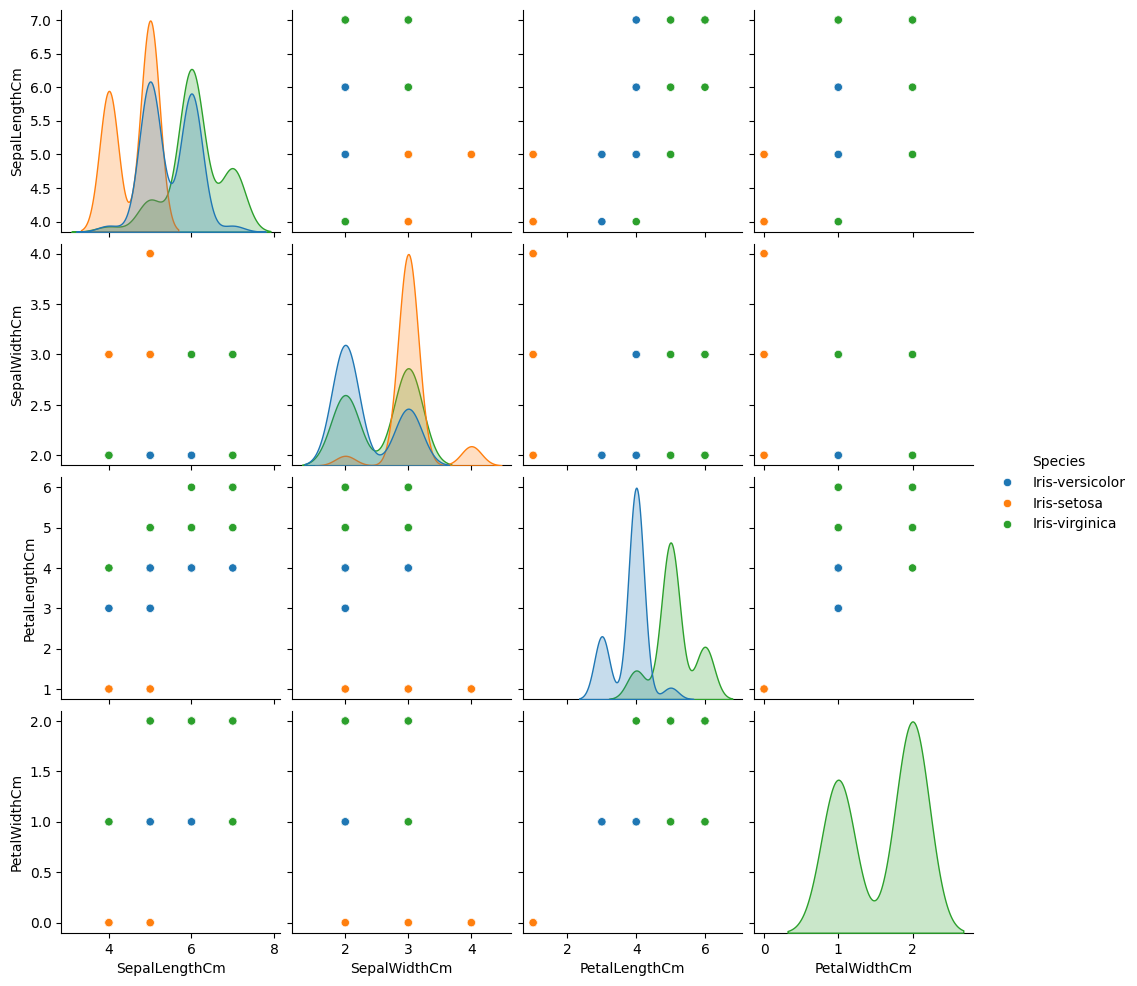

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt





combined_df = pd.concat([XX, yy_single.rename('Species')], axis=1)

# Convert the one-hot encoded labels to actual species names
# Assuming 'yy_single' contains the target labels after using idxmax and cleaning the label names
# Example: yy_single = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# Now we can generate the pairplot with the species as hue
sns.pairplot(combined_df, hue='Species')

# Display the plot
plt.show()


In [48]:
OHE_Shuffled_Cleaned_dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
73,6,2,4,1,0,1,0
18,5,3,1,0,1,0,0
118,7,2,6,2,0,0,1
78,6,2,4,1,0,1,0
76,6,2,4,1,0,1,0
...,...,...,...,...,...,...,...
71,6,2,4,1,0,1,0
106,4,2,4,1,0,0,1
14,5,4,1,0,1,0,0
92,5,2,4,1,0,1,0


In [49]:


def prepare_data_splits(dataset, feature_tags, label_tags,
                        train_size=0.8, val_size=0.1, test_size=0.1, random_state=42):
    """
    Splits a dataset into training, validation, and test sets based on input tags and proportions.

    Args:
        dataset (pd.DataFrame): Input dataset
        feature_tags (list): List of column names to use as features
        label_tags (list): List of column names to use as labels
        train_size (float): Proportion of data for training (default: 0.6)
        val_size (float): Proportion of data for validation (default: 0.2)
        test_size (float): Proportion of data for testing (default: 0.2)
        random_state (int): Random seed for reproducibility

    Returns:
        A dictionary containing:
            - 'feature_tags', 'label_tags'
            - 'X_all', 'y_all'
            - 'X_train', 'X_val', 'X_test'
            - 'y_train', 'y_val', 'y_test'
    """

    assert abs(train_size + val_size + test_size - 1.0) < 1e-6, "Train, val, and test sizes must sum to 1"

    # Extract full feature and label arrays
    X_all = dataset[feature_tags]
    y_all = dataset[label_tags]

    # First split: Train vs (Val + Test)
    X_temp, X_test, y_temp, y_test = train_test_split(
        X_all, y_all, test_size=test_size, random_state=random_state)

    # Adjust val proportion relative to remaining (val + train)
    relative_val_size = val_size / (train_size + val_size)

    # Second split: Train vs Val
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=relative_val_size, random_state=random_state)

    return {
        'feature_tags': feature_tags,
        'label_tags': label_tags,
        'X_all': X_all,
        'y_all': y_all,
        'X_train': X_train,
        'X_val': X_val,
        'X_test': X_test,
        'y_train': y_train,
        'y_val': y_val,
        'y_test': y_test
    }


In [65]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

def prepare_data_splits(dataset, feature_tags, label_tags,
                        degree=3, n_components=10, train_size=0.8, val_size=0.1, test_size=0.1, random_state=42):
    """
    Splits a dataset into training, validation, and test sets based on input tags and proportions.
    Also applies polynomial feature expansion, normalization, and PCA transformation with user-defined components.

    Args:
        dataset (pd.DataFrame): Input dataset
        feature_tags (list): List of column names to use as features
        label_tags (list): List of column names to use as labels
        degree (int): Degree of polynomial features (default: 3)
        n_components (int): Number of components for PCA (default: 10)
        train_size (float): Proportion of data for training (default: 0.8)
        val_size (float): Proportion of data for validation (default: 0.1)
        test_size (float): Proportion of data for testing (default: 0.1)
        random_state (int): Random seed for reproducibility

    Returns:
        A dictionary containing preprocessed data:
            - 'X_train', 'X_val', 'X_test'
            - 'y_train', 'y_val', 'y_test'
    """

    assert abs(train_size + val_size + test_size - 1.0) < 1e-6, "Train, val, and test sizes must sum to 1"

    # Extract full feature and label arrays
    X_all = dataset[feature_tags].values  # Convert to numpy array for processing
    y_all = dataset[label_tags].values

    # First split: Train vs (Val + Test)
    X_temp, X_test, y_temp, y_test = train_test_split(
        X_all, y_all, test_size=test_size, random_state=random_state)

    # Adjust val proportion relative to remaining (val + train)
    relative_val_size = val_size / (train_size + val_size)

    # Second split: Train vs Val
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=relative_val_size, random_state=random_state)

    # 1. Apply PolynomialFeatures
    poly = PolynomialFeatures(degree, include_bias=False)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_val = poly.transform(X_val)
    X_poly_test = poly.transform(X_test)

    # 2. Normalize using StandardScaler
    scaler = StandardScaler()
    X_poly_train_normalized = scaler.fit_transform(X_poly_train)
    X_poly_val_normalized = scaler.transform(X_poly_val)
    X_poly_test_normalized = scaler.transform(X_poly_test)

    # 3. Apply PCA for dimensionality reduction
    pca = PCA(n_components=n_components)  # Use the user-specified n_components for PCA
    X_train_pca = pca.fit_transform(X_poly_train_normalized)
    X_val_pca = pca.transform(X_poly_val_normalized)
    X_test_pca = pca.transform(X_poly_test_normalized)

    return {
        'X_train': X_train_pca,
        'X_val': X_val_pca,
        'X_test': X_test_pca,
        'y_train': y_train,
        'y_val': y_val,
        'y_test': y_test
    }


In [85]:
Splitted_Dataset_Dictionary=prepare_data_splits(  OHE_Shuffled_Cleaned_dataset,
                                                  ['SepalLengthCm',	'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
                                                  ['Species_Iris-setosa',	'Species_Iris-versicolor',	'Species_Iris-virginica'],
                                                  degree=3,
                                                  n_components=1,
                                                  train_size=0.8,
                                                  val_size=0.1,
                                                  test_size=0.1,
                                                  random_state=42)

In [87]:
pd.DataFrame(Splitted_Dataset_Dictionary['X_test'])


,0
0,0.338669
1,-0.882955
2,-1.931847
3,-4.886550
4,7.979316
5,-4.489537
6,-0.882955
7,0.341670
8,-5.685406
9,-4.886550
